In [1]:
import astropy.io.fits as fits
import astropy.constants as const
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, mark_inset)
import scipy.interpolate as interp
from scipy.interpolate import interp1d
from matplotlib import cm
import matplotlib
from astropy.constants import R_jup, R_sun, k_B
from astropy.constants import u as atomic_mass_unit  # atomic mass unit

In [2]:
def read_opacity(f):
    block = fits.getdata(f)
    T = block[:,0][1:]
    wl = block[0][1:]
    K = block[1:,1:]
    return(wl, K, T)
    
#Element 0,0 is a dummy value equal to zero.
wl, K_H2O, T_axis = read_opacity('exoplanetary_atmospheres_data/H2O_opacity.fits')
wl, K_CO2, T_axis = read_opacity('exoplanetary_atmospheres_data/CO2_opacity.fits')
wl = wl/1000 # transform nm to micro-m

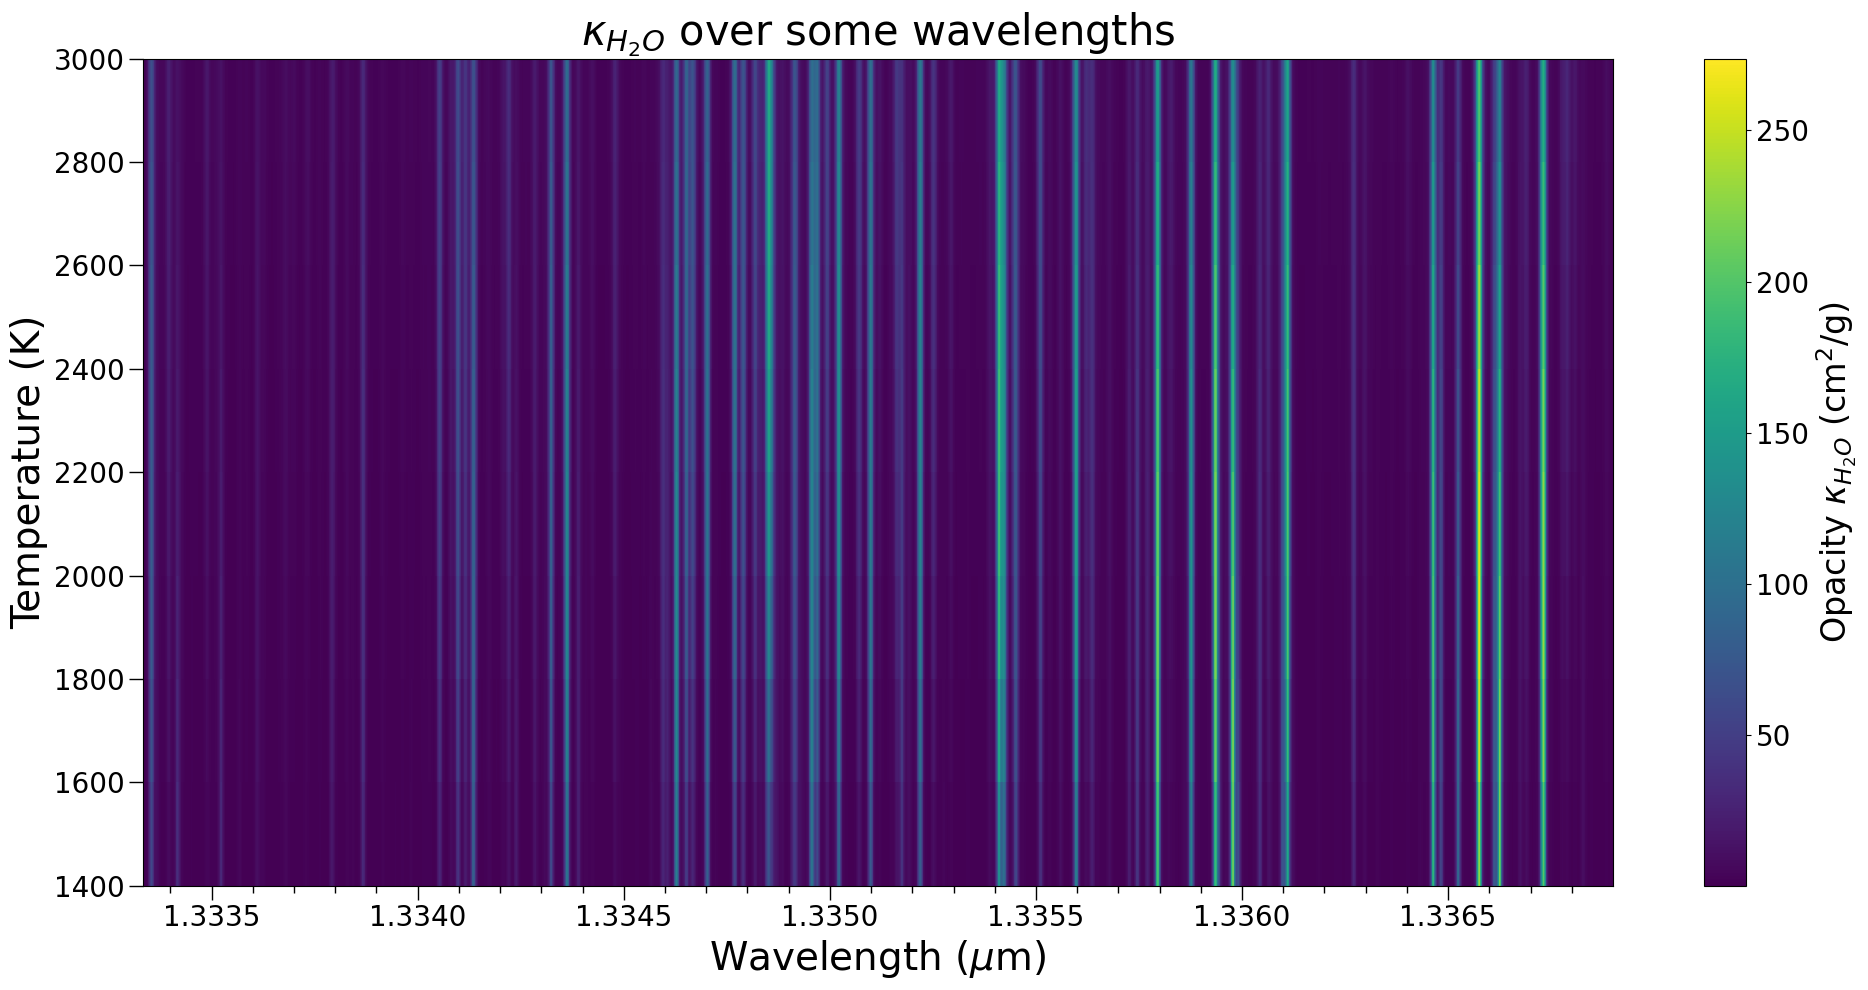

In [3]:
plt.figure(figsize=(20,10))

# You can uncomment one of these lines based on which slice you want to visualize
plt.pcolormesh(wl[-502000:-500000], T_axis, K_H2O[:, -502000:-500000], shading='nearest', cmap='viridis')
#plt.pcolormesh(wl[-600000:-400000], T_axis, K_H2O[:, -600000:-400000], shading='nearest', cmap='viridis')
#plt.pcolormesh(wl, T_axis, K_H2O, shading='nearest', cmap='viridis')

cbar = plt.colorbar()
cbar.set_label(r'Opacity $\kappa_{H_2O}$ (cm$^2$/g)', fontsize=24)
cbar.ax.tick_params(labelsize=20)

plt.xlabel(r'Wavelength ($\mu$m)', fontsize=28)
plt.ylabel(r'Temperature (K)', fontsize=28)
plt.title(r'$\kappa_{H_2O}$ over some wavelengths', fontsize=30)

ax = plt.gca()
ax.ticklabel_format(useOffset=False)

for axx in [ax]:
    axx.xaxis.set_tick_params(labelsize=20)
    axx.yaxis.set_tick_params(labelsize=20)
    axx.xaxis.set_minor_locator(AutoMinorLocator(5))
    axx.tick_params('both', length=10, width=1, which='major')
    axx.tick_params('both', length=5, width=1, which='minor')

plt.tight_layout()
#plt.savefig('opacities2D.png')
plt.show()

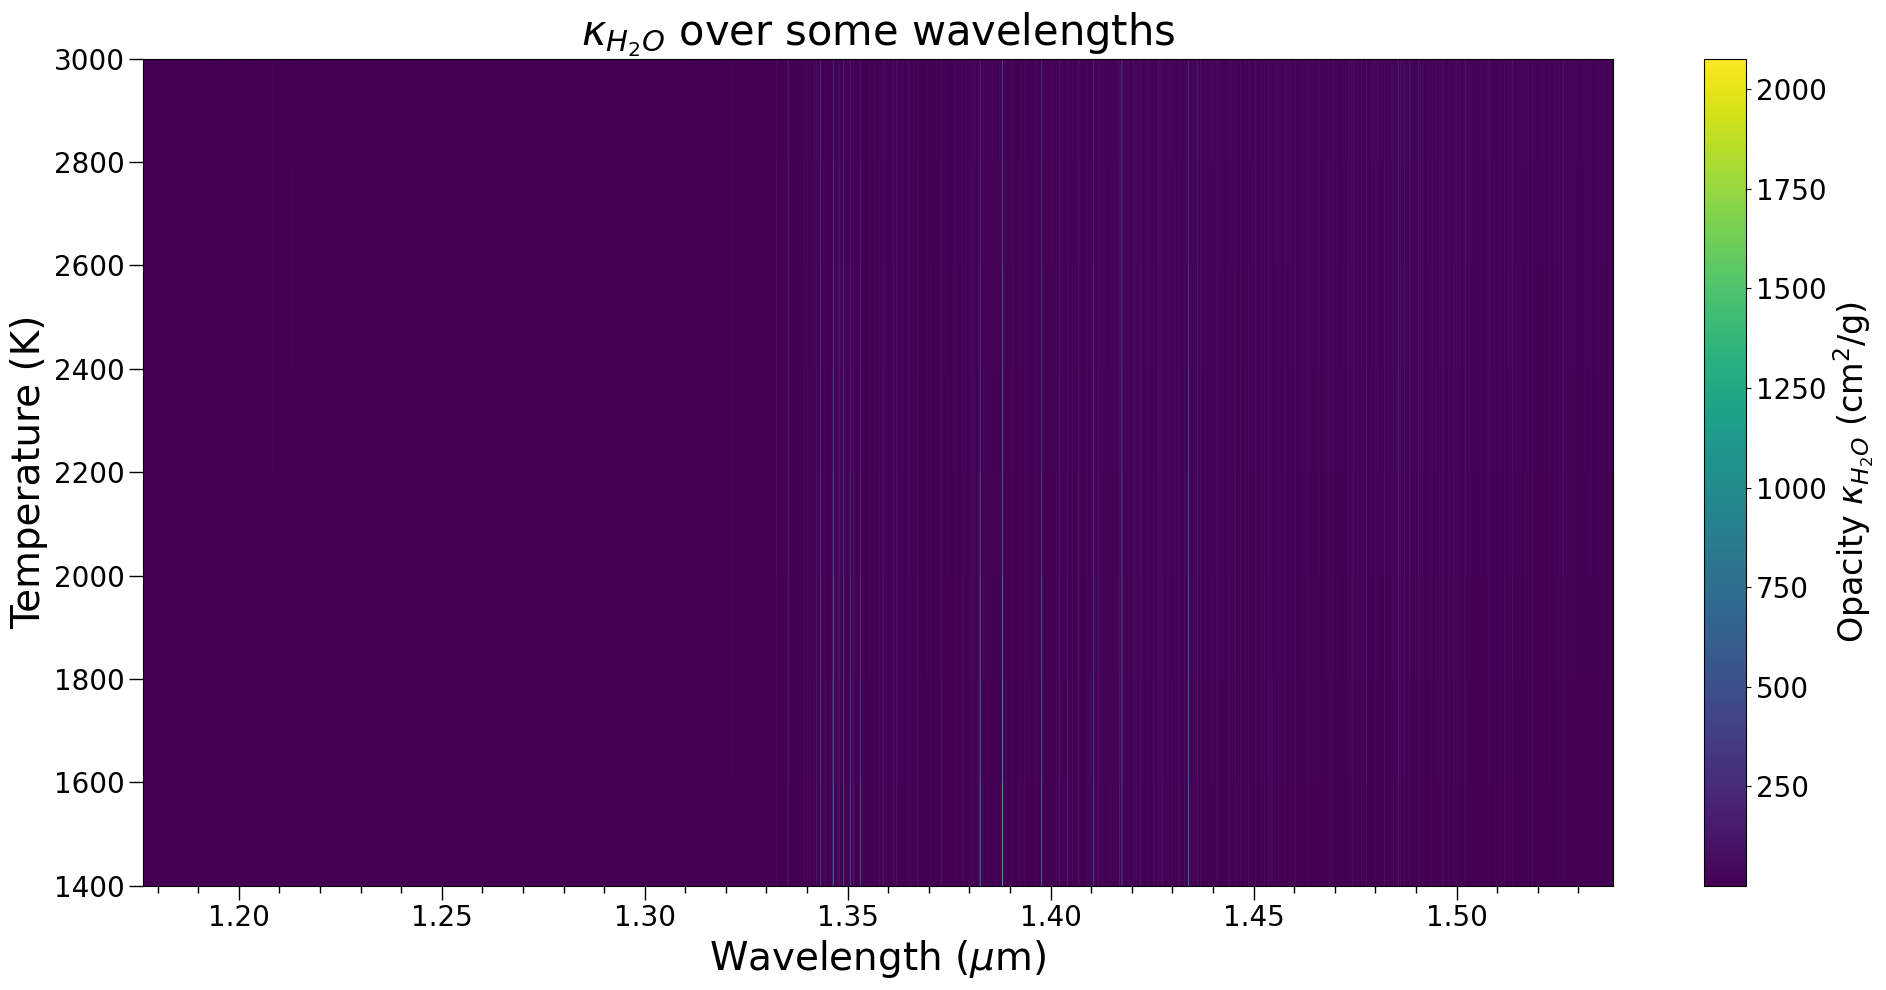

In [4]:
plt.figure(figsize=(20,10))

# You can uncomment one of these lines based on which slice you want to visualize
#plt.pcolormesh(wl[-502000:-500000], T_axis, K_H2O[:, -502000:-500000], shading='nearest', cmap='viridis')
plt.pcolormesh(wl[-600000:-400000], T_axis, K_H2O[:, -600000:-400000], shading='nearest', cmap='viridis')
#plt.pcolormesh(wl, T_axis, K_H2O, shading='nearest', cmap='viridis')

cbar = plt.colorbar()
cbar.set_label(r'Opacity $\kappa_{H_2O}$ (cm$^2$/g)', fontsize=24)
cbar.ax.tick_params(labelsize=20)

plt.xlabel(r'Wavelength ($\mu$m)', fontsize=28)
plt.ylabel(r'Temperature (K)', fontsize=28)
plt.title(r'$\kappa_{H_2O}$ over some wavelengths', fontsize=30)

ax = plt.gca()
ax.ticklabel_format(useOffset=False)

for axx in [ax]:
    axx.xaxis.set_tick_params(labelsize=20)
    axx.yaxis.set_tick_params(labelsize=20)
    axx.xaxis.set_minor_locator(AutoMinorLocator(5))
    axx.tick_params('both', length=10, width=1, which='major')
    axx.tick_params('both', length=5, width=1, which='minor')

plt.tight_layout()
#plt.savefig('opacities2D.png')
plt.show()

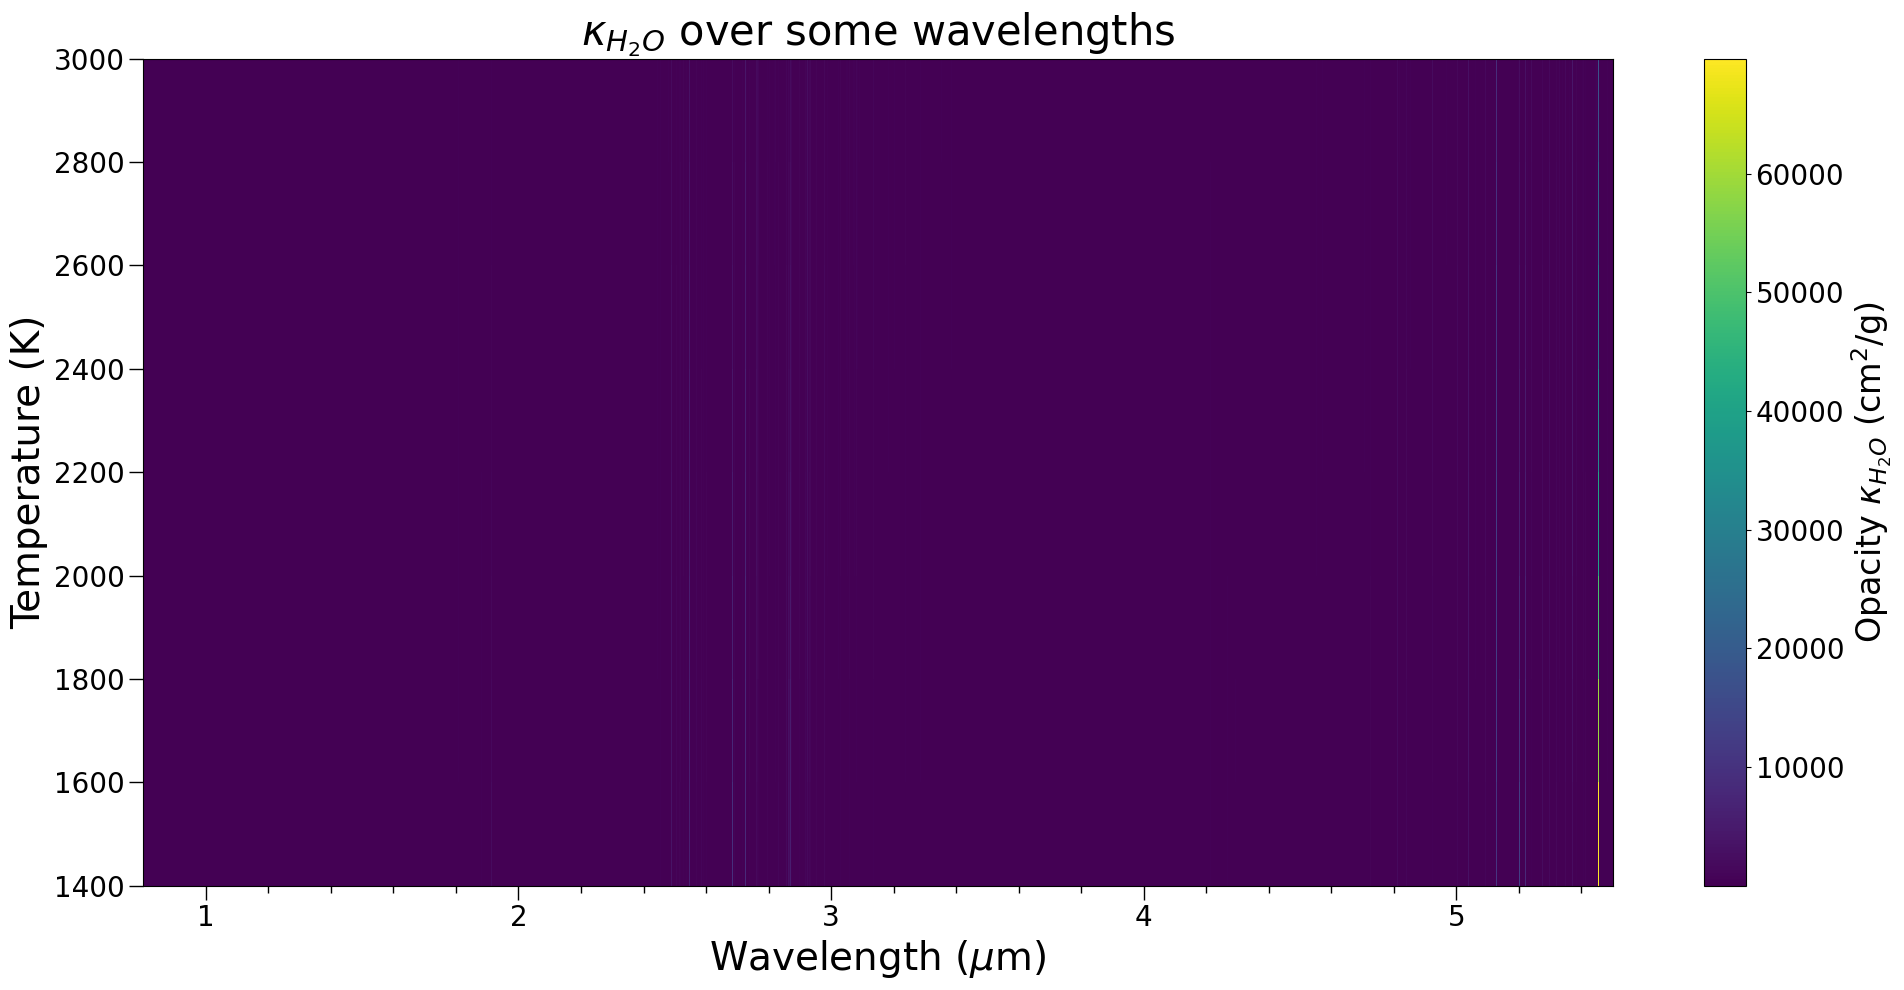

In [5]:
plt.figure(figsize=(20,10))

# You can uncomment one of these lines based on which slice you want to visualize
#plt.pcolormesh(wl[-502000:-500000], T_axis, K_H2O[:, -502000:-500000], shading='nearest', cmap='viridis')
#plt.pcolormesh(wl[-600000:-400000], T_axis, K_H2O[:, -600000:-400000], shading='nearest', cmap='viridis')
plt.pcolormesh(wl, T_axis, K_H2O, shading='nearest', cmap='viridis')

cbar = plt.colorbar()
cbar.set_label(r'Opacity $\kappa_{H_2O}$ (cm$^2$/g)', fontsize=24)
cbar.ax.tick_params(labelsize=20)

plt.xlabel(r'Wavelength ($\mu$m)', fontsize=28)
plt.ylabel(r'Temperature (K)', fontsize=28)
plt.title(r'$\kappa_{H_2O}$ over some wavelengths', fontsize=30)

ax = plt.gca()
ax.ticklabel_format(useOffset=False)

for axx in [ax]:
    axx.xaxis.set_tick_params(labelsize=20)
    axx.yaxis.set_tick_params(labelsize=20)
    axx.xaxis.set_minor_locator(AutoMinorLocator(5))
    axx.tick_params('both', length=10, width=1, which='major')
    axx.tick_params('both', length=5, width=1, which='minor')

plt.tight_layout()
#plt.savefig('opacities2D.png')
plt.show()

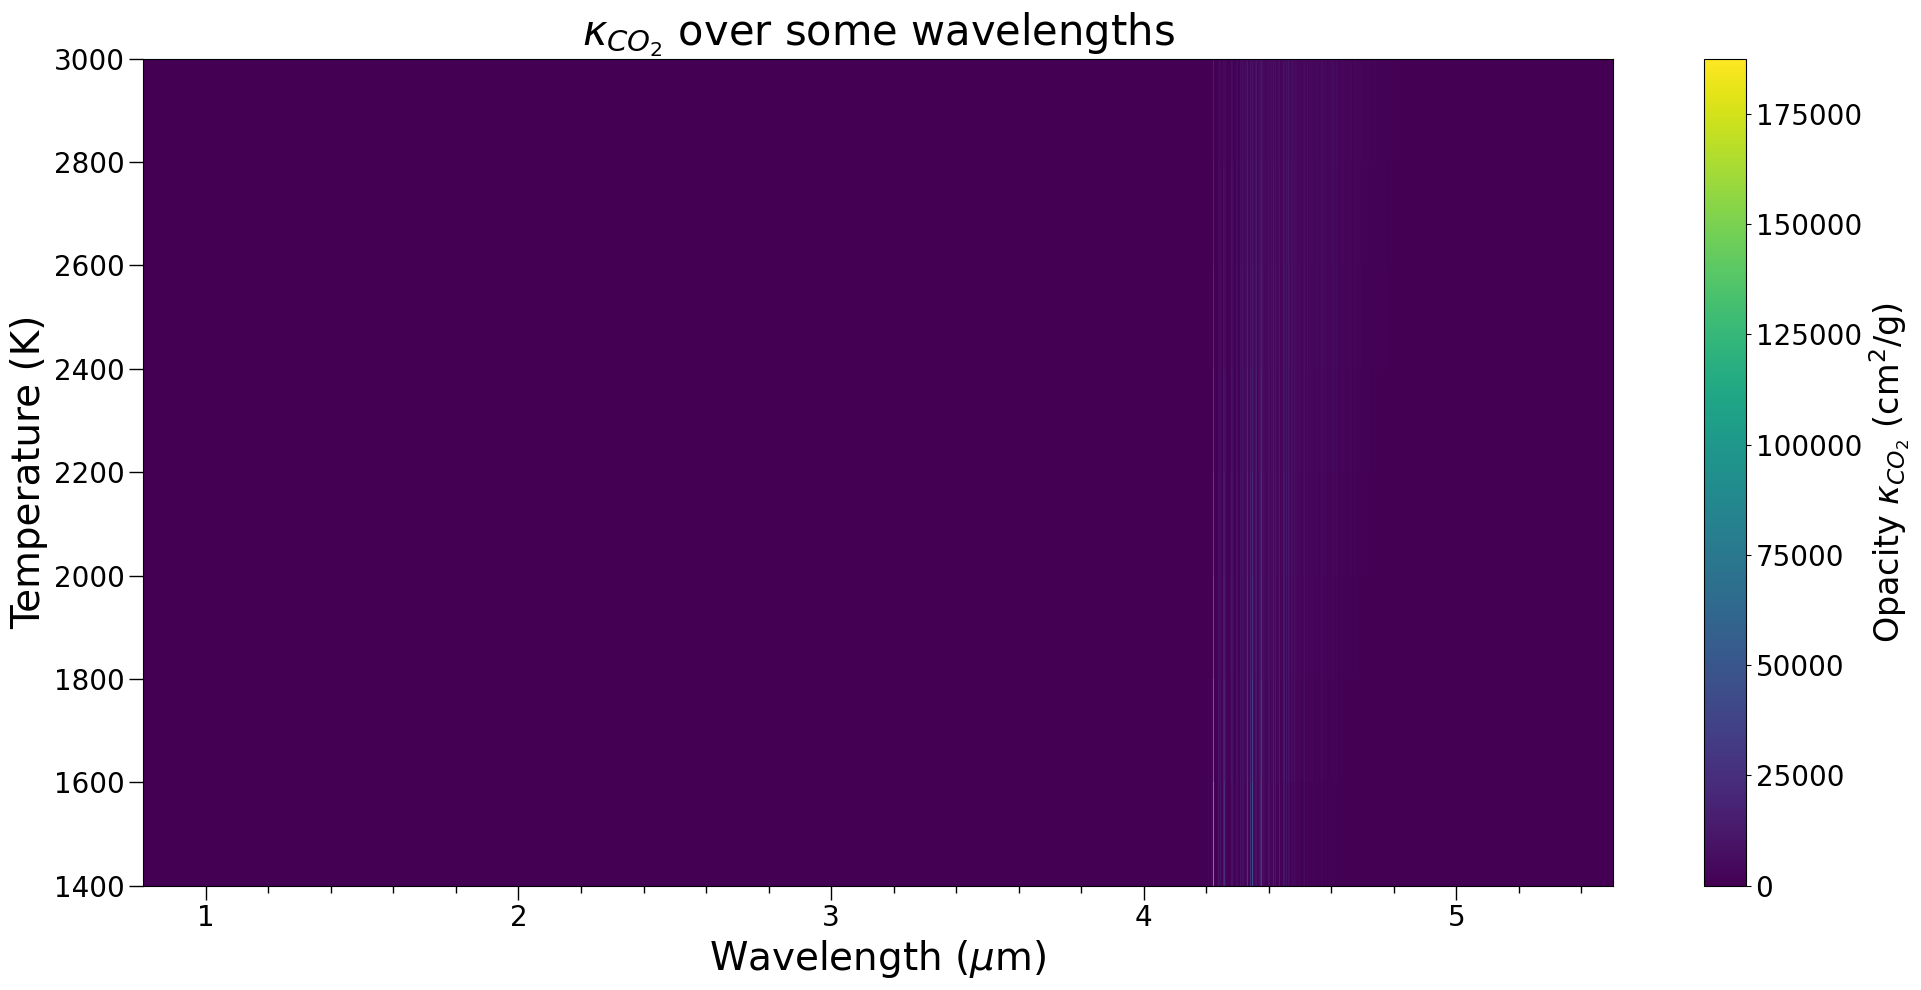

In [6]:
plt.figure(figsize=(20,10))

# You can uncomment one of these lines based on which slice you want to visualize
#plt.pcolormesh(wl[-502000:-500000], T_axis, K_CO2[:, -502000:-500000], shading='nearest', cmap='viridis')
#plt.pcolormesh(wl[-600000:-400000], T_axis, K_CO2[:, -600000:-400000], shading='nearest', cmap='viridis')
plt.pcolormesh(wl, T_axis, K_CO2, shading='nearest', cmap='viridis')

cbar = plt.colorbar()
cbar.set_label(r'Opacity $\kappa_{CO_2}$ (cm$^2$/g)', fontsize=24)
cbar.ax.tick_params(labelsize=20)

plt.xlabel(r'Wavelength ($\mu$m)', fontsize=28)
plt.ylabel(r'Temperature (K)', fontsize=28)
plt.title(r'$\kappa_{CO_2}$ over some wavelengths', fontsize=30)

ax = plt.gca()
ax.ticklabel_format(useOffset=False)

for axx in [ax]:
    axx.xaxis.set_tick_params(labelsize=20)
    axx.yaxis.set_tick_params(labelsize=20)
    axx.xaxis.set_minor_locator(AutoMinorLocator(5))
    axx.tick_params('both', length=10, width=1, which='major')
    axx.tick_params('both', length=5, width=1, which='minor')

plt.tight_layout()
#plt.savefig('opacities2D.png')
plt.show()

In [7]:
# Mixing ratios (dimensionless)
chi_H2O_WSP = 0.7e-3
chi_CO2_WSP = 0.6e-10
kappa_c_WSP = 0.0

chi_H2O_HD = 5e-3
chi_CO2_HD = 1e-10
kappa_c_HD = 0.0

# Planetary & Stellar Radii (in meters)
R0_WSP = (1.786 * R_jup).to(u.m).value       # ≈ 1.2768e8 m
R0_HD  = (1.25 * R_jup).to(u.m).value        # ≈ 8.9365e7 m
RS_WSP = (1.57 * R_sun).to(u.m).value        # ≈ 1.0933e9 m
RS_HD  = (1.148 * R_sun).to(u.m).value       # ≈ 7.9979e8 m

# Temperatures (K)
T_WSP = (1200.0 * u.K).value
T_HD  = (1500.0 * u.K).value

# Reference pressure (Pa)
P0_WSP = (10.0 * u.bar).to(u.Pa).value       # = 1e6 Pa
P0_HD  = (10.0 * u.bar).to(u.Pa).value       # = 1e6 Pa

# Mean molecular weight (kg)
mu_WSP = (2.33 * atomic_mass_unit).to(u.kg).value   # ≈ 3.871e-27 kg
mu_HD  = (2.33 * atomic_mass_unit).to(u.kg).value

# Gravitational acceleration (m/s²)
g_WSP = 43.67
g_HD  = 28.8

# Boltzmann constant (J/K)
kB_val = k_B.si.value     # = 1.380649e-23 J/K

# Euler-Mascheroni constant (dimensionless)
gamma = 0.57721

# Molecular masses (kg)
m_H2O = (18.01528 * atomic_mass_unit).to(u.kg).value   # ≈ 2.9915e-26 kg
m_CO2 = (44.0095 * atomic_mass_unit).to(u.kg).value    # ≈ 7.3070e-26 kg

In [8]:
#We need to interpolate our opacity onto the chosen temperature.
K_H2O_WSP = interp.interp1d(T_axis, K_H2O, bounds_error = False, axis=0, fill_value = (K_H2O[0], K_H2O[-1]))(T_WSP)
K_CO2_WSP = interp.interp1d(T_axis,K_CO2, bounds_error=False, axis = 0, fill_value = (K_CO2[0], K_CO2[-1]))(T_WSP)

K_H2O_HD = interp.interp1d(T_axis, K_H2O, bounds_error = False, axis = 0, fill_value = (K_H2O[0], K_H2O[-1]))(T_HD)
K_CO2_HD = interp.interp1d(T_axis,K_CO2, bounds_error=False, axis = 0, fill_value = (K_CO2[0], K_CO2[-1]))(T_HD)

K_WSP = (m_H2O * chi_H2O_WSP * K_H2O_WSP + m_CO2 * chi_CO2_WSP * K_CO2_WSP + kappa_c_WSP) * (u.cm**2 / u.g).to(u.m**2 / u.kg) # CGS to SI
K_HD = (m_H2O * chi_H2O_HD * K_H2O_HD + m_CO2 * chi_CO2_HD * K_CO2_HD + kappa_c_HD)* (u.cm**2 / u.g).to(u.m**2 / u.kg)

In [9]:
def scale_height(T, m, g):
    H = kB_val * T / (m * g)
    return H # meters

H_WSP = scale_height(T_WSP, mu_WSP, g_WSP)
H_HD = scale_height(T_HD, mu_HD, g_HD)
print(H_WSP)
print(H_HD)

98056.48435478189
185856.19235127282


Compute the effective planetary radius including atmospheric extension.

    
    Parameters:
        R_0   : float, base radius (m)
        H     : float, scale height ()
        gamma : float, Euler-Mascheroni constant (dimensionless)
        P_0   : float, reference pressure (Pa)
        kappa : float, mean opacity (m²/kg)
        g     : float, gravity (m/s²)
    
    Returns:\
        R     : float, effective radius (m)

In [10]:
def effective_rad(R_0, H, gamma, P_0, kappa, g):
    # Dimensionless argument for the log
    arg = (P_0 * kappa / g) * np.sqrt((2 * np.pi * R_0) / H)

    # Log argument must be dimensionless — it is, by construction
    R = R_0 + H * (gamma + np.log(arg))
    return R

# molar mass of water (H₂O) in kg/mol
M_H2O = 18.01528 * u.g / u.mol   # = 0.01801528 kg/mol

# Suppose kappa has units of cm²/mol
kappa_1_WASP_mol = K1_WASP  # your variable
kappa_2_HD_mol = K2_HD
kappa_1_WASP_mass = kappa_1_WASP_mol / M_H2O   # Now in cm²/kg
kappa_2_HD_mass = kappa_2_HD_mol / M_H2O
kappa_1_WASP_mass = kappa_1_WASP_mass.to(u.m**2 / u.kg)  # Convert to SI
kappa_2_HD_mass = kappa_2_HD_mass.to(u.m**2 / u.kg)

In [11]:
R_eff_WASP = effective_rad(R0_WSP, H_WSP, gamma, P0_WSP, K_WSP, g_WSP)
R_eff_HD = effective_rad(R0_HD, H_HD, gamma, P0_HD, K_HD, g_HD)
print(R_eff_WASP)
print(R_eff_HD)

[1.22770112e+08 1.22881630e+08 1.23001385e+08 ... 1.22272670e+08
 1.22279952e+08 1.22280101e+08]
[80400074.0102211  80611443.7665229  80838428.74802904 ...
 79457221.05596346 79471023.9840213  79471305.8211215 ]


In [12]:
radius_ratio_WSP = ((R_eff_WASP/RS_WSP)**2)*10**2
radius_ratio_HD = ((R_eff_HD/RS_HD)**2)*10**2
print(radius_ratio_WSP)
print(radius_ratio_HD)

[1.26340327 1.26569951 1.26816772 ... 1.25318583 1.25333511 1.25333816]
[1.01340983 1.0187453  1.02449052 ... 0.98978065 0.99012456 0.99013159]


In [13]:
wave_WSP, flux_WSP, err_WSP = np.loadtxt('exoplanetary_atmospheres_data/Hubble_Deming.txt', unpack=True)
flux_WSP = flux_WSP*10**2

In [14]:
wave_HD, flux_HD = np.loadtxt('exoplanetary_atmospheres_data/Hubble_Kreidberg.txt', unpack=True)

In [15]:
print(wave_WSP)
print(flux_WSP)
print(radius_ratio_WSP)

[1.11838791 1.13803526 1.15465995 1.1743073  1.19395466 1.21209068
 1.23173804 1.24836272 1.26952141 1.28916877 1.30579345 1.32695214
 1.34357683 1.36322418 1.3813602  1.40251889 1.41612091 1.43576826
 1.45692695 1.47657431 1.50075567 1.51586902 1.5324937  1.55062972
 1.57329975 1.58992443 1.60806045 1.63224181]
[1.45111111 1.45462585 1.45655329 1.4522449  1.45292517 1.45496599
 1.45723356 1.4538322  1.4522449  1.45371882 1.45371882 1.46052154
 1.46857143 1.47786848 1.47526077 1.47877551 1.47061224 1.47038549
 1.4676644  1.46936508 1.47231293 1.46414966 1.46777778 1.46709751
 1.46414966 1.45961451 1.45292517 1.4639229 ]
[1.26340327 1.26569951 1.26816772 ... 1.25318583 1.25333511 1.25333816]


In [16]:
print(wave_HD)
print(flux_HD)
print(radius_ratio_HD)

[0.86638298 0.92510638 0.98382979 1.04       1.0987234  1.14723404
 1.21489362 1.28638298 1.35404255 1.42297872 1.49191489 1.56212766
 1.63106383]
[1.44414835 1.44236264 1.44016484 1.4425     1.43906593 1.43837912
 1.43645604 1.43260989 1.45802198 1.46008242 1.45293956 1.44744505
 1.43315934]
[1.01340983 1.0187453  1.02449052 ... 0.98978065 0.99012456 0.99013159]


In [17]:
print(err_WSP)

[6.e-05 5.e-05 5.e-05 4.e-05 4.e-05 4.e-05 4.e-05 4.e-05 4.e-05 4.e-05
 4.e-05 4.e-05 4.e-05 4.e-05 4.e-05 4.e-05 4.e-05 4.e-05 4.e-05 4.e-05
 4.e-05 4.e-05 4.e-05 4.e-05 4.e-05 4.e-05 5.e-05 6.e-05]


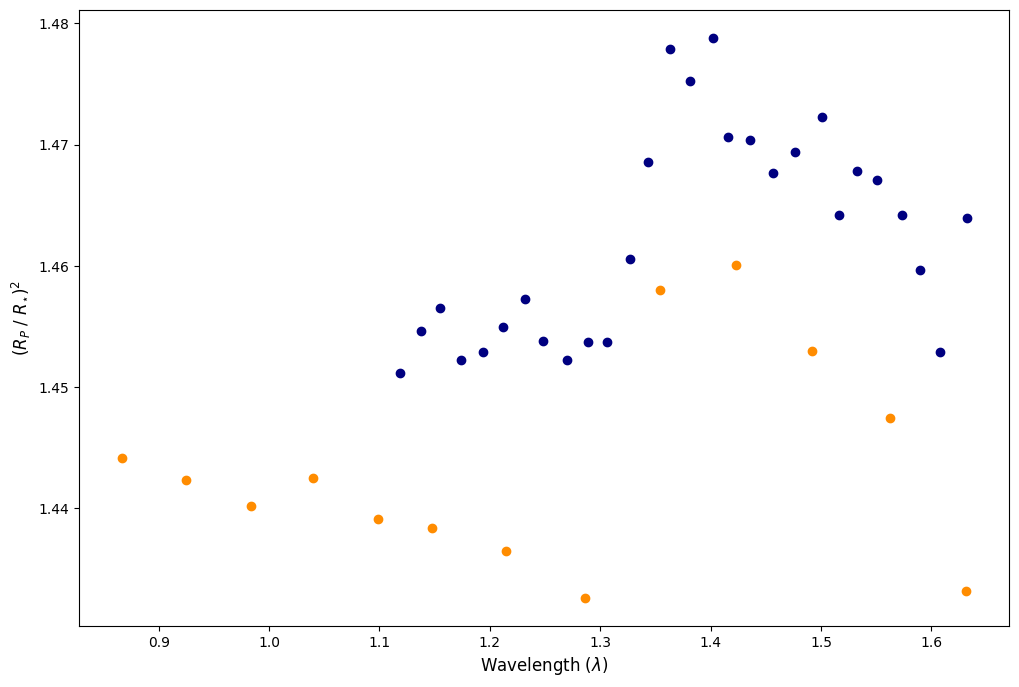

In [18]:
plt.figure(figsize=(12,8))
plt.errorbar(wave_WSP, flux_WSP, yerr = err_WSP, fmt='o', capsize=3, elinewidth=1, color='navy')
plt.scatter(wave_HD, flux_HD, color='darkorange')
plt.xlabel(r'Wavelength ($\lambda$)', fontsize=12)
plt.ylabel(r'$(R_P \ / \ R_{\star})^2$', fontsize=12)
plt.show()

In [19]:
# Get the min and max wavelength range for WASP-12b and HD
wave_min_WSP, wave_max_WSP = wave_WSP.min(), wave_WSP.max()
wave_min_HD, wave_max_HD = wave_HD.min(), wave_HD.max()

# Create a mask to select only values within this range from the full 'wl' and 'transmission_W' arrays
# WASP
mask_WSP = (wl >= wave_min_WSP) & (wl <= wave_max_WSP)
wave_cut_WSP = wl[mask_WSP]
R_eff_cut_WASP = R_eff_WASP[mask_WSP]

# HD
mask_HD = (wl >= wave_min_HD) & (wl <= wave_max_HD)
wave_cut_HD = wl[mask_HD]
R_eff_cut_HD = R_eff_HD[mask_HD]

# Radius ratios cut
radius_ratio_cut_WSP = ((R_eff_cut_WASP/RS_WSP)**2)*10**2
radius_ratio_cut_HD = ((R_eff_cut_HD/RS_HD)**2)*10**2

In [22]:
WSP_model_interp = interp1d(wave_cut_WSP, radius_ratio_cut_WSP, bounds_error=False, fill_value="extrapolate")
WSP_model_binned = WSP_model_interp(wave_WSP)

# Calculate the vertical offset between model and data
#offset = np.mean(flux_WSP - WSP_model_binned)

# Apply the offset to the entire model
#radius_ratio_cut_WSP_shifted = radius_ratio_cut_WSP + offset

In [23]:
def chi_squared(offset):
    model_binned_shifted = WSP_model_binned + offset
    return np.sum(((flux_WSP - model_binned_shifted) / err_WSP)**2)

from scipy.optimize import minimize_scalar
result = minimize_scalar(chi_squared)
best_offset = result.x

radius_ratio_cut_WSP_shifted = radius_ratio_cut_WSP + best_offset

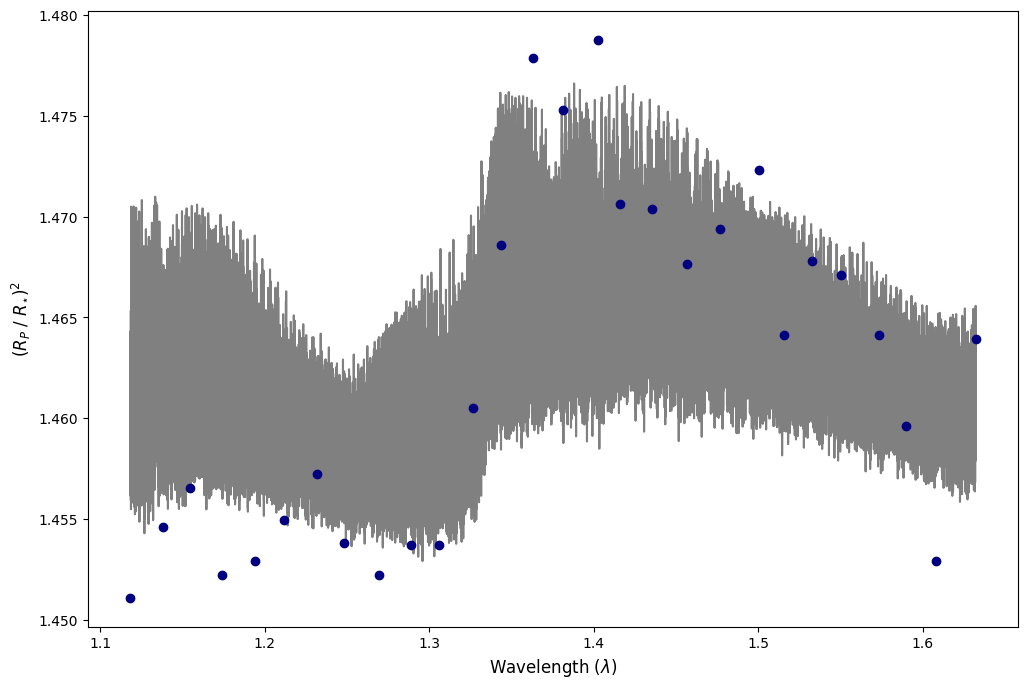

In [24]:
plt.figure(figsize=(12,8))
plt.errorbar(wave_WSP, flux_WSP, yerr = err_WSP, fmt='o', capsize=3, elinewidth=1, color='navy')
plt.plot(wave_cut_WSP, radius_ratio_cut_WSP_shifted, color='gray')
plt.xlabel(r'Wavelength ($\lambda$)', fontsize=12)
plt.ylabel(r'$(R_P \ / \ R_{\star})^2$', fontsize=12)
plt.show()

In [27]:
HD_model_interp = interp1d(wave_cut_HD, radius_ratio_cut_HD, bounds_error=False, fill_value="extrapolate")
HD_model_binned = HD_model_interp(wave_HD)

# Calculate the vertical offset between model and data
offset = np.mean(flux_HD - HD_model_binned)

# Apply the offset to the entire model
radius_ratio_cut_HD_shifted = radius_ratio_cut_HD + offset

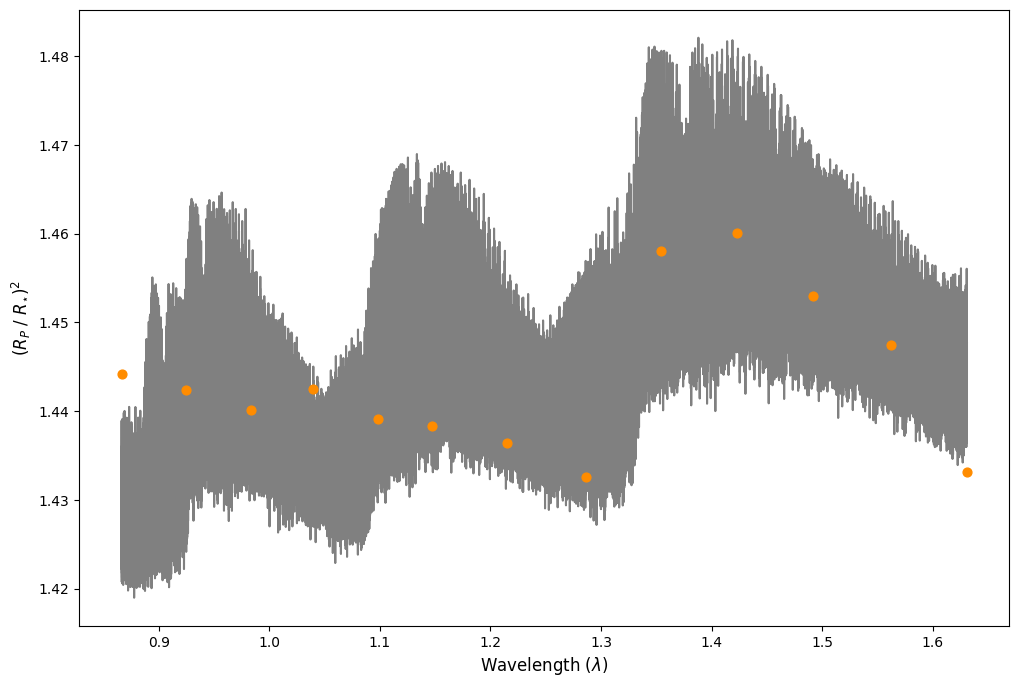

In [34]:
plt.figure(figsize=(12,8))
plt.plot(wave_cut_HD, radius_ratio_cut_HD_shifted, color='gray')
plt.scatter(wave_HD, flux_HD, color='darkorange', s=40, zorder=5)
plt.xlabel(r'Wavelength ($\lambda$)', fontsize=12)
plt.ylabel(r'$(R_P \ / \ R_{\star})^2$', fontsize=12)
plt.show()